In [1]:
# Imports we may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import ujson as json
import bz2
import pyarrow.parquet as pq

from wikidata.client import Client
import wikipedia

import urllib.request
from textblob import TextBlob

client = Client()

In [2]:
#read YYYY quotes file

#chunks_2008 = pd.read_json("data/quotes-2008.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
#chunks_2009 = pd.read_json("data/quotes-2009.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
#chunks_2010 = pd.read_json("data/quotes-2010.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
#chunks_2011 = pd.read_json("data/quotes-2011.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
#chunks_2012 = pd.read_json("data/quotes-2012.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
#chunks_2013 = pd.read_json("data/quotes-2013.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
#chunks_2014 = pd.read_json("data/quotes-2014.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
chunks_2015 = pd.read_json("data/quotes-2015.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
chunks_2016 = pd.read_json("data/quotes-2016.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
chunks_2017 = pd.read_json("data/quotes-2017.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
chunks_2018 = pd.read_json("data/quotes-2018.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
chunks_2019 = pd.read_json("data/quotes-2019.json.bz2",lines=True, chunksize = 10000, compression = "bz2")
chunks_2020 = pd.read_json("data/quotes-2020.json.bz2",lines=True, chunksize = 10000, compression = 'bz2')

chunks_YYYY = [chunks_2015, chunks_2016, chunks_2017, chunks_2018, chunks_2019, chunks_2020]

years_list= ["2015", "2016", "2017", "2018","2019", "2020"]

In [3]:
def filter_dataframe(word, year):
    list_df = []
    with pd.read_json("data/quotes-"+year+".json.bz2", lines=True,  chunksize = 10000, compression = 'bz2') as df_reader:
        for chunk in df_reader:
            chunk_word = chunk[chunk['quotation'].str.contains(word)]
            list_df.append(chunk_word)
    df_word = pd.concat(list_df)
    return df_word

In [4]:
def removing_not_inherent_quotes(list_of_words, df, aliases):
    for word in list_of_words:
        df_copy = df[~df['quotation'].str.contains(word)]
    for alias in aliases:
        df_new = df_copy[~df_copy['speaker'].str.contains(alias)]
    return df_new

In [10]:
for year in years_list:
    one_df_Trump = filter_dataframe("Trump", year)
    one_df_Trump.to_csv('df_Trump'+year+'.csv', index=False)
    print('i finished one file')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Luca\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Luca\AppData\Local\Temp/ipykernel_22572/3825970724.py", line 2, in <module>
    one_df_Trump = filter_dataframe("Trump", year)
  File "C:\Users\Luca\AppData\Local\Temp/ipykernel_22572/2252990486.py", line 4, in filter_dataframe
    for chunk in df_reader:
  File "C:\Users\Luca\anaconda3\envs\ada\lib\site-packages\pandas\io\json\_json.py", line 795, in __next__
    lines = list(islice(self.data, self.chunksize))
  File "C:\Users\Luca\anaconda3\envs\ada\lib\bz2.py", line 184, in read1
    return self._buffer.read1(size)
  File "C:\Users\Luca\anaconda3\envs\ada\lib\_compression.py", line 68, in readinto
    data = self.read(len(byte_view))
  File "C:\Users\Luca\anaconda3\envs\ada\lib\_compression.py", line 103, in read
    data = self._decompressor.decompress(rawblock, 

TypeError: object of type 'NoneType' has no len()

In [5]:
list_df_Trump = []
for year in years_list:
    one_df_Trump = pd.read_csv('df_Trump'+year+'.csv')
    list_df_Trump.append(one_df_Trump)
df_Trump = pd.concat(list_df_Trump)

In [6]:
df_Trump

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E
...,...,...,...,...,...,...,...,...,...
52263,2020-02-05-103219,Trump offends and disrespects the Venezuelan p...,Jorge Arreaza,['Q6623799'],2020-02-05 00:00:00,11,"[['Jorge Arreaza', '0.9164'], ['None', '0.0726...",['https://www.rawstory.com/2020/02/imwithfred-...,E
52264,2020-02-05-103235,"Trump survived, but he is the most unpopular p...",None,[],2020-02-05 23:11:42,3,"[['None', '0.8786'], ['Donald Trump', '0.1214']]",['https://www.wellsvilledaily.com/zz/news/2020...,E
52265,2020-03-13-071475,"Trump tried to mitigate the issue, saying it i...",Hassan Nasrallah,['Q181182'],2020-03-13 22:15:06,1,"[['Hassan Nasrallah', '0.922'], ['None', '0.07...",['http://israelnationalnews.com/News/News.aspx...,E
52266,2020-03-15-037086,Trump's do-over approach -- he unlocked $50 bi...,Newt Gingrich,['Q182788'],2020-03-15 00:00:00,40,"[['Newt Gingrich', '0.5146'], ['None', '0.3958...",['http://uspolitics.einnews.com/article/512089...,E


In [13]:
# we save it (checkpoint)
df_Trump.to_csv('df_Trump.csv', index=False)

In [6]:
df_Trump = pd.read_csv('df_Trump.csv')

In [7]:
parquet_frame = pd.read_parquet("data/speaker_attributes.parquet")

QID_columns = ["nationality", "gender", "ethnic_group", "occupation", "party", "candidacy", "religion"]

In [8]:
parquet_frame

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055976,[Barker Howard],None,[Q30],[Q6581097],1397399351,None,None,[Q82955],None,None,Q106406560,Barker B. Howard,None,item,None
9055977,[Charles Macomber],None,[Q30],[Q6581097],1397399471,None,None,[Q82955],None,None,Q106406571,Charles H. Macomber,None,item,None
9055978,None,[+1848-04-01T00:00:00Z],None,[Q6581072],1397399751,None,None,None,None,None,Q106406588,Dina David,None,item,None
9055979,None,[+1899-03-18T00:00:00Z],None,[Q6581072],1397399799,None,None,None,None,None,Q106406593,Irma Dexinger,None,item,None


In [9]:
n_rows_before_cleaning = df_Trump.shape[0]

In [10]:
count = 0
for el in parquet_frame['aliases']:
    count=count+1
    if type(el) == np.ndarray:
        if ('Trump' in el):
            Trump_aliases = el
            print(Trump_aliases)

['Donald John Trump' 'Donald J. Trump' 'Trump' 'The Donald' 'POTUS 45'
 'Donald J Trump' 'President Donald Trump' 'President Trump'
 'President Donald J. Trump' 'President Donald John Trump' 'DJT'
 'Mr Trump' 'President Donald J Trump' 'John Barron' 'John Miller'
 'David Dennison']


In [11]:
df_Trump = removing_not_inherent_quotes(['Frederick Trump', 'Elizabeth Christ Trump', 'John George Trump',
                                        'Fred Trump', 'Maryanne Trump Barry', 'Mary Trump', 'Ivana Trump', 
                                        'Melania Trump', 'Donald Trump, Jr.', 'Ivanka Trump',
                                        'Eric Trump', 'Tiffany Trump', 'Barron Trump', 'Chrystelle Trump Bond',
                                        'David H. Trump', 'Judd Trump', 'Kelly Trump', 'Peter Trump'], df_Trump, Trump_aliases)

In [12]:
df_Trump

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E
...,...,...,...,...,...,...,...,...,...
52263,2020-02-05-103219,Trump offends and disrespects the Venezuelan p...,Jorge Arreaza,['Q6623799'],2020-02-05 00:00:00,11,"[['Jorge Arreaza', '0.9164'], ['None', '0.0726...",['https://www.rawstory.com/2020/02/imwithfred-...,E
52264,2020-02-05-103235,"Trump survived, but he is the most unpopular p...",None,[],2020-02-05 23:11:42,3,"[['None', '0.8786'], ['Donald Trump', '0.1214']]",['https://www.wellsvilledaily.com/zz/news/2020...,E
52265,2020-03-13-071475,"Trump tried to mitigate the issue, saying it i...",Hassan Nasrallah,['Q181182'],2020-03-13 22:15:06,1,"[['Hassan Nasrallah', '0.922'], ['None', '0.07...",['http://israelnationalnews.com/News/News.aspx...,E
52266,2020-03-15-037086,Trump's do-over approach -- he unlocked $50 bi...,Newt Gingrich,['Q182788'],2020-03-15 00:00:00,40,"[['Newt Gingrich', '0.5146'], ['None', '0.3958...",['http://uspolitics.einnews.com/article/512089...,E


In [13]:
n_rows_after_cleaning = df_Trump.shape[0]

   before   after
0  935293  935291


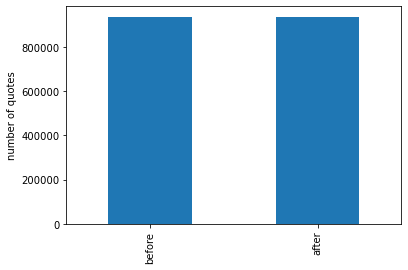

In [39]:
## histogram

# we create a new dataframe for the sake of visualization
dic = {'before' : [n_rows_before_cleaning], 'after' : [n_rows_after_cleaning]}
df_visual = pd.DataFrame.from_dict(dic)
print(df_visual)
df_visual.mean().plot(kind='bar')
plt.ylabel('number of quotes')
plt.show()

As we can see from the plot there are a few sentences that we cleaned, the majority of them was already about Donald Trump and not said by Trump

In [40]:
# we save it (checkpoint)
df_Trump.to_csv('df_Trump_cleaned.csv', index=False)

In [44]:
# for each row of the dataset we apply a sentimental analysis tool to understand if the author is speaking with a positive or negative
# tone with respect to Donald Trump

df_Trump['sentiment'] = df_Trump['quotation'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [45]:
df_Trump

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E,-0.050000
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E,-0.048214
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E,0.000000
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E,0.450000
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E,0.000000
...,...,...,...,...,...,...,...,...,...,...
52263,2020-02-05-103219,Trump offends and disrespects the Venezuelan p...,Jorge Arreaza,['Q6623799'],2020-02-05 00:00:00,11,"[['Jorge Arreaza', '0.9164'], ['None', '0.0726...",['https://www.rawstory.com/2020/02/imwithfred-...,E,-0.800000
52264,2020-02-05-103235,"Trump survived, but he is the most unpopular p...",None,[],2020-02-05 23:11:42,3,"[['None', '0.8786'], ['Donald Trump', '0.1214']]",['https://www.wellsvilledaily.com/zz/news/2020...,E,0.350000
52265,2020-03-13-071475,"Trump tried to mitigate the issue, saying it i...",Hassan Nasrallah,['Q181182'],2020-03-13 22:15:06,1,"[['Hassan Nasrallah', '0.922'], ['None', '0.07...",['http://israelnationalnews.com/News/News.aspx...,E,-0.083333
52266,2020-03-15-037086,Trump's do-over approach -- he unlocked $50 bi...,Newt Gingrich,['Q182788'],2020-03-15 00:00:00,40,"[['Newt Gingrich', '0.5146'], ['None', '0.3958...",['http://uspolitics.einnews.com/article/512089...,E,0.066667


In [46]:
df_Trump.to_csv('df_Trump_with_sentiments.csv', index = False)

In [47]:
df_Trump.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"['Q15735939', 'Q25189328', 'Q5107375', 'Q51108...",2015-06-18 10:00:00,1,"[['Chris Matthews', '0.3869'], ['None', '0.319...",['http://talkingpointsmemo.com/dc/donald-trump...,E,-0.050000
1,2015-09-16-006359,And I'm just pointing out the absurd on both s...,Kathleen Madigan,['Q6376814'],2015-09-16 05:44:37,1,"[['Kathleen Madigan', '0.8025'], ['None', '0.1...",['http://northjersey.com/arts-and-entertainmen...,E,-0.048214
2,2015-05-11-003168,"And you had Michael Jackson roller skating, an...",Jim McMahon,"['Q1689159', 'Q17306267', 'Q6196886']",2015-05-11 02:03:27,1,"[['Jim McMahon', '0.8731'], ['None', '0.1232']...",['http://www.seattletimes.com/seattle-news/bel...,E,0.000000
3,2015-10-20-044420,I like that he's not spinning things. He seems...,None,[],2015-10-20 23:46:58,1,"[['None', '0.7832'], ['Ben Carson', '0.0755'],...",['http://detroitnews.com/story/news/politics/2...,E,0.450000
4,2015-12-22-031341,"I promise, I won't talk about Trump again,",Jeb Bush,['Q221997'],2015-12-22 20:43:59,10,"[['Jeb Bush', '0.7816'], ['None', '0.1677'], [...",['http://www.politico.com/story/2015/12/jeb-bu...,E,0.000000
5,2015-05-20-027996,"If I recall correctly, tickets for newly-elect...",None,[],2015-05-20 03:11:06,1,"[['None', '0.9528'], ['Donald Trump', '0.0472']]",['http://chicago.suntimes.com/news/7/71/609234...,E,0.392857
6,2015-07-21-047379,I'm sure the Republicans are enjoying Mr. Trum...,President Barack Obama,['Q76'],2015-07-21 15:18:20,205,"[['President Barack Obama', '0.6523'], ['None'...",['http://azdailysun.com/entertainment/televisi...,E,0.333333
7,2015-07-22-051864,"it in particular thrives on theater, which Tru...",Frank Bruni,['Q1443006'],2015-07-22 13:33:11,1,"[['Frank Bruni', '0.8479'], ['None', '0.1246']...",['http://www.adweek.com/tvnewser/bob-kerrey-on...,E,0.166667
8,2015-07-14-074352,it was appalling to hear Donald Trump describe...,Hillary Clinton,['Q6294'],2015-07-14 08:40:17,1,"[['Hillary Clinton', '0.8129'], ['None', '0.11...",['http://www.bloomberg.com/politics/articles/2...,E,-0.350000
9,2015-11-30-060853,It's a coalition meeting. Some of these pastor...,Katrina Pierson,['Q22121130'],2015-11-30 14:25:50,1,"[['Katrina Pierson', '0.4136'], ['None', '0.36...",['http://www.politico.com/story/2015/11/trump-...,E,-0.150000


We check if the sentimental analysis makes sense for the first ten samples in our dataframe

In [69]:
for i in range(10):
    quote = df_Trump['quotation'].values[i]
    print(quote)
    print(df_Trump['sentiment'].values[i])


How long do you think it'll take for Donald Trump to take a crack at the President for engineering [ the storm ]?
-0.05
And I'm just pointing out the absurd on both sides, I'm not side-taking... I mean, this year, it's already started out gangbusters. Trump's giving free helicopter rides to children in Iowa. I mean, he's really Willy Wonka. I would want to go. I'm not even sure I like Donald Trump, but dude, really? I mean, unless Hillary Clinton's gon na build a roller coaster, I don't know how she can compete with this.
-0.0482142857142857
And you had Michael Jackson roller skating, and Donald Trump,
0.0
I like that he's not spinning things. He seems genuine in what he says. He's not the showman that Trump is, but I think he's sincere in his beliefs.
0.45
I promise, I won't talk about Trump again,
0.0
If I recall correctly, tickets for newly-elected Mayor Richard M. Daley's lunch were on top... but Trump is certainly right up there,
0.39285714285714285
I'm sure the Republicans are en

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

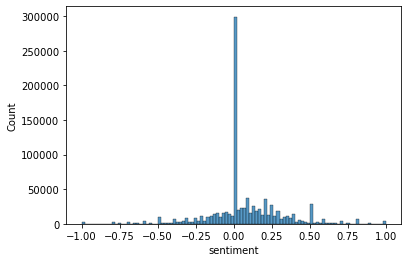

In [73]:
sns.histplot(data = df_Trump['sentiment'], bins=100) 